In [1]:
from yuma import *
import torch
import pandas as pd

In [11]:
def run_experiment(major_self_weight, minor_self_weight, minor_stake): 
    W = torch.tensor([
        [major_self_weight, 1 - major_self_weight],
        [1 - minor_self_weight, minor_self_weight],
    ])

    W_honest = torch.tensor([
        [major_self_weight, 1 - major_self_weight],
        [major_self_weight, 1 - major_self_weight],
    ])

    S = torch.tensor([1 - minor_stake, minor_stake])
    yuma_result_adv = Yuma2(W, S)
    yuma_result_honest = Yuma2(W_honest, S)

    result = {
        'major_self_weight': major_self_weight,
        'minor_self_weight': minor_self_weight,
        'minor_stake': minor_stake,
        'minor_incentive_adv': yuma_result_adv['server_incentive'][1].item(),
        'minor_dividend_adv': yuma_result_adv['validator_reward_normalized'][1].item(),
        'minor_incentive_honest': yuma_result_honest['server_incentive'][1].item(),
        'minor_dividend_honest': yuma_result_honest['validator_reward_normalized'][1].item(),
    }
    return result

results = []
for major_self_weight in np.arange(0, 1, 0.05):
    for minor_self_weight in np.arange(0, 1, 0.01):
        for minor_stake in np.arange(0, 0.45, 0.05):
            result = run_experiment(major_self_weight, minor_self_weight, minor_stake)
            results.append(result)

In [56]:
def run_experiment_2(major_self_weight, minor_self_weight, minor_stake):
    W = torch.tensor([
        [major_self_weight/6] * 6,
        [major_self_weight/6] * 6,
    ])

    W_honest = torch.tensor([
        [major_self_weight/6] * 6,
        [major_self_weight/6] * 6,
    ])

    W[1, 2:] += minor_self_weight
    W[1] = W[1] / W[1].sum()

    S = torch.tensor([1 - minor_stake, minor_stake])
    yuma_result_adv = Yuma2(W, S)
    yuma_result_honest = Yuma2(W_honest, S)

    result = {
        'major_self_weight': major_self_weight,
        'minor_self_weight': minor_self_weight,
        'minor_stake': minor_stake,
        'minor_incentive_adv': yuma_result_adv['server_incentive'][2:].sum().item(),
        'minor_dividend_adv': yuma_result_adv['validator_reward_normalized'][1].sum().item(),
        'minor_incentive_honest': yuma_result_honest['server_incentive'][2:].sum().item(),
        'minor_dividend_honest': yuma_result_honest['validator_reward_normalized'][1].sum().item(),
    }
    return result

results = []
for major_self_weight in np.arange(0, 1, 0.05):
    for minor_self_weight in np.arange(0, 0.5, 0.01):
        for minor_stake in np.arange(0, 0.45, 0.05):
            result = run_experiment(major_self_weight, minor_self_weight, minor_stake)
            results.append(result)

In [57]:
df = pd.DataFrame(results)

df['emission_adv'] = df['minor_incentive_adv'] + df['minor_dividend_adv']
df['emission_honest'] = df['minor_incentive_honest'] + df['minor_dividend_honest']
df['gain_adv'] = df['emission_adv'] - df['emission_honest']

# df[df.gain_adv > 1e-4]
df.sort_values('gain_adv', ascending=False).head(10)

,major_self_weight,minor_self_weight,minor_stake,minor_incentive_adv,minor_dividend_adv,minor_incentive_honest,minor_dividend_honest,emission_adv,emission_honest,gain_adv
6169,0.65,0.35,0.20,0.350009,0.20,0.350009,0.20,0.550009,0.550009,1.110223e-16
6574,0.70,0.30,0.20,0.300011,0.20,0.300011,0.20,0.500011,0.500011,1.110223e-16
6172,0.65,0.35,0.35,0.350009,0.35,0.350009,0.35,0.700009,0.700009,1.110223e-16
6173,0.65,0.35,0.40,0.350009,0.40,0.350009,0.40,0.750009,0.750009,1.110223e-16
6578,0.70,0.30,0.40,0.300011,0.40,0.300011,0.40,0.700011,0.700011,1.110223e-16
6168,0.65,0.35,0.15,0.350009,0.15,0.350009,0.15,0.500009,0.500009,1.110223e-16
5763,0.60,0.40,0.15,0.400000,0.15,0.400000,0.15,0.550000,0.550000,1.110223e-16
5764,0.60,0.40,0.20,0.400000,0.20,0.400000,0.20,0.600000,0.600000,1.110223e-16
7793,0.85,0.15,0.40,0.150004,0.40,0.150004,0.40,0.550004,0.550004,1.110223e-16
7388,0.80,0.20,0.40,0.200000,0.40,0.200000,0.40,0.600000,0.600000,1.110223e-16


/tmp/ipykernel_1631826/993272297.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _df = _df[df.minor_stake == minor_stake]
/tmp/ipykernel_1631826/993272297.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _df = _df[df.minor_stake == minor_stake]
/tmp/ipykernel_1631826/993272297.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _df = _df[df.minor_stake == minor_stake]
/tmp/ipykernel_1631826/993272297.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _df = _df[df.minor_stake == minor_stake]
/tmp/ipykernel_1631826/993272297.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _df = _df[df.minor_stake == minor_stake]
/tmp/ipykernel_1631826/993272297.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _df = _df[df.minor_stake == minor_stake]
/tmp/ipykernel_1631826/993272297.py:8: UserWarning: 

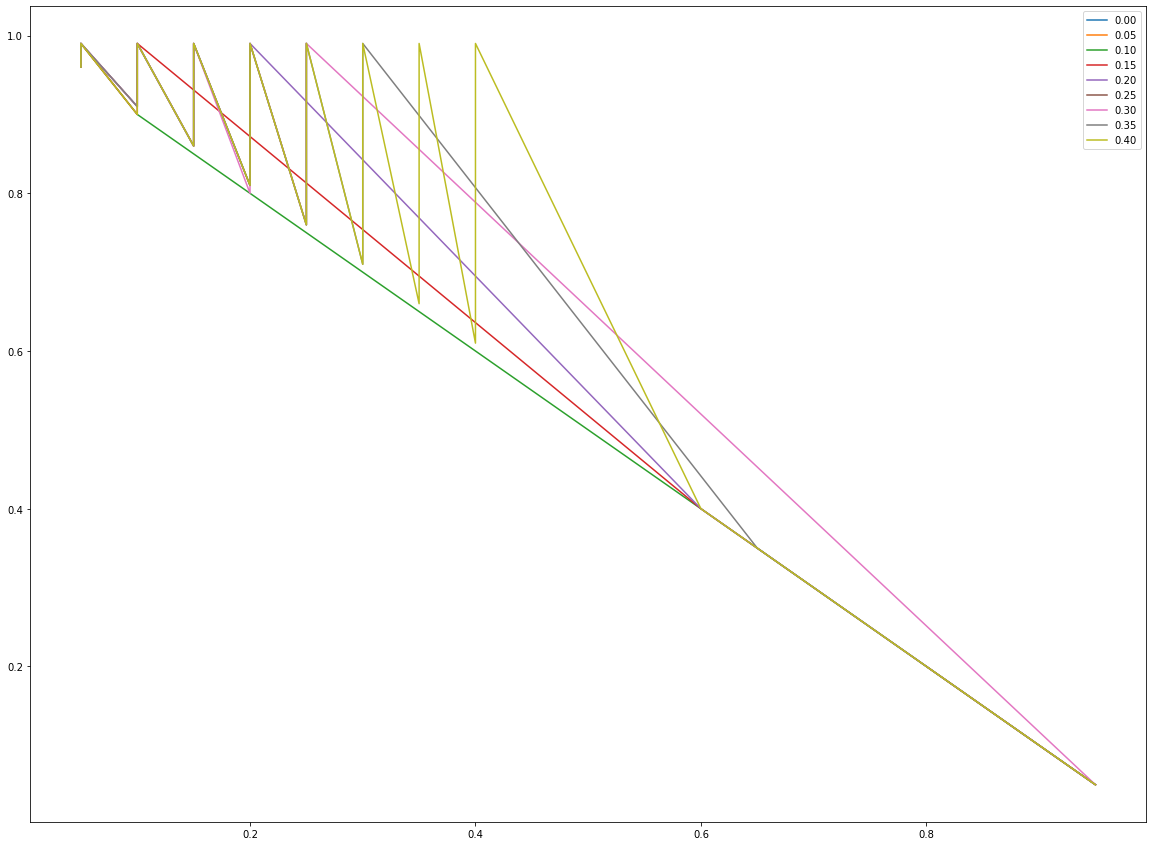

In [23]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(20, 15))

step = 0.1
for minor_stake in np.arange(0, 0.45, 0.05):
    _df = df[df.gain_adv > 0]
    _df = _df[df.minor_stake == minor_stake]
    plt.plot(
        _df['major_self_weight'],
        _df['minor_self_weight'],
        label=f'{minor_stake:.2f}'
    )
plt.legend()